# Final Week: Crop and Fertiliser Recommendation System using Machine Learning

## Crop Recommendation Notebook

This notebook is part of the internship project **"Crop and Fertiliser Recommendation System using Machine Learning"** and focuses solely on the **Crop Recommendation** module.

It includes data preprocessing, feature scaling, model training, evaluation, and building a predictive system for recommending the best crop based on soil and environmental factors.


# Week 2: Data Preprocessing and Feature Scaling

In Week 2, we focused on preparing the dataset for machine learning. This included handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets.

Next, we scaled the features to ensure they are on the same scale, which improves model performance and training stability. We used `StandardScaler` from `sklearn.preprocessing` to transform both training and test datasets.

# Week 3: Model Training and Crop Recommendation System

Continuing from the preprocessing step where the features are scaled, we now train a machine learning model to recommend crops based on environmental conditions.

We use a **Decision Tree Classifier** from `sklearn.tree`, which is simple to interpret and effective for classification tasks like ours. The steps include:

1. Initializing the model.  
2. Fitting the model to the scaled training data.  
3. Predicting crop classes on the test data.  
4. Evaluating model performance using accuracy scores on both training and test datasets to check for good generalization.

We then create a function called `crop_recommend()` that accepts real environmental parameters (nitrogen, phosphorus, potassium, temperature, humidity, pH, rainfall) as input. This function uses the trained model to predict the most suitable crop. The output is the crop name, mapped from the predicted class label using a dictionary.

To make this system reusable and deployable, we save (serialize) the trained model and the scaler using the `pickle` module. This lets us load the model later and make predictions on new input data without retraining.

Finally, we demonstrate loading the saved model and scaler, then using them to predict the best crop for new environmental inputs. This shows how the model can be integrated into real-world applications such as web or mobile apps.


## Week 2: Data Preprocessing and Exploration

In this section, we'll load the dataset, inspect its structure, perform basic data exploration, and prepare the data for training by handling missing values, duplications, and categorical encoding.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Importing Data

Now, let's load the crop recommendation dataset and explore its structure.


In [2]:
# load the dataset
crop = pd.read_csv("/content/Crop_recommendation.csv")
crop.head()  # crop.tail(100)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


The dataset consists of multiple features such as nitrogen (N), phosphorus (P), potassium (K), temperature, humidity, pH, rainfall, and the target variable, 'label', which represents different crops.


In [3]:
# Check the shape of the dataset
crop.shape


(2200, 8)

The dataset has 2200 entries and 8 columns, which are as follows:
- N: Nitrogen content
- P: Phosphorus content
- K: Potassium content
- temperature: Temperature in Celsius
- humidity: Humidity percentage
- ph: pH level of the soil
- rainfall: Amount of rainfall in mm
- label: The target variable indicating the crop type


In [4]:
# Check the basic information of the dataset
crop.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Next, we'll check for any missing values and duplicated entries in the dataset.


In [5]:
# Check the missing values in the dataset
crop.isnull().sum()


,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


There are no missing values in the dataset.


In [6]:
# Check the duplicated values in the dataset
crop.duplicated().sum()


np.int64(0)

There are no duplicated rows in the dataset.


In [7]:
# Check the basic statistics of the dataset
crop.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


The dataset contains statistical information such as mean, standard deviation, minimum, and maximum values for each feature. This helps in understanding the distribution of the features.


### Exploring Data

Now, we will analyze the distribution of each feature and check the correlation between the features.


In [8]:
# Check the target distribution
crop['label'].value_counts()


,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


The 'label' column contains different crop types, each having an equal distribution of 100 entries.


In [9]:
# List the features excluding the target column 'label'
features = crop.columns.to_list()
features.remove('label')
print(features)


['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


The features in the dataset are: 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'.


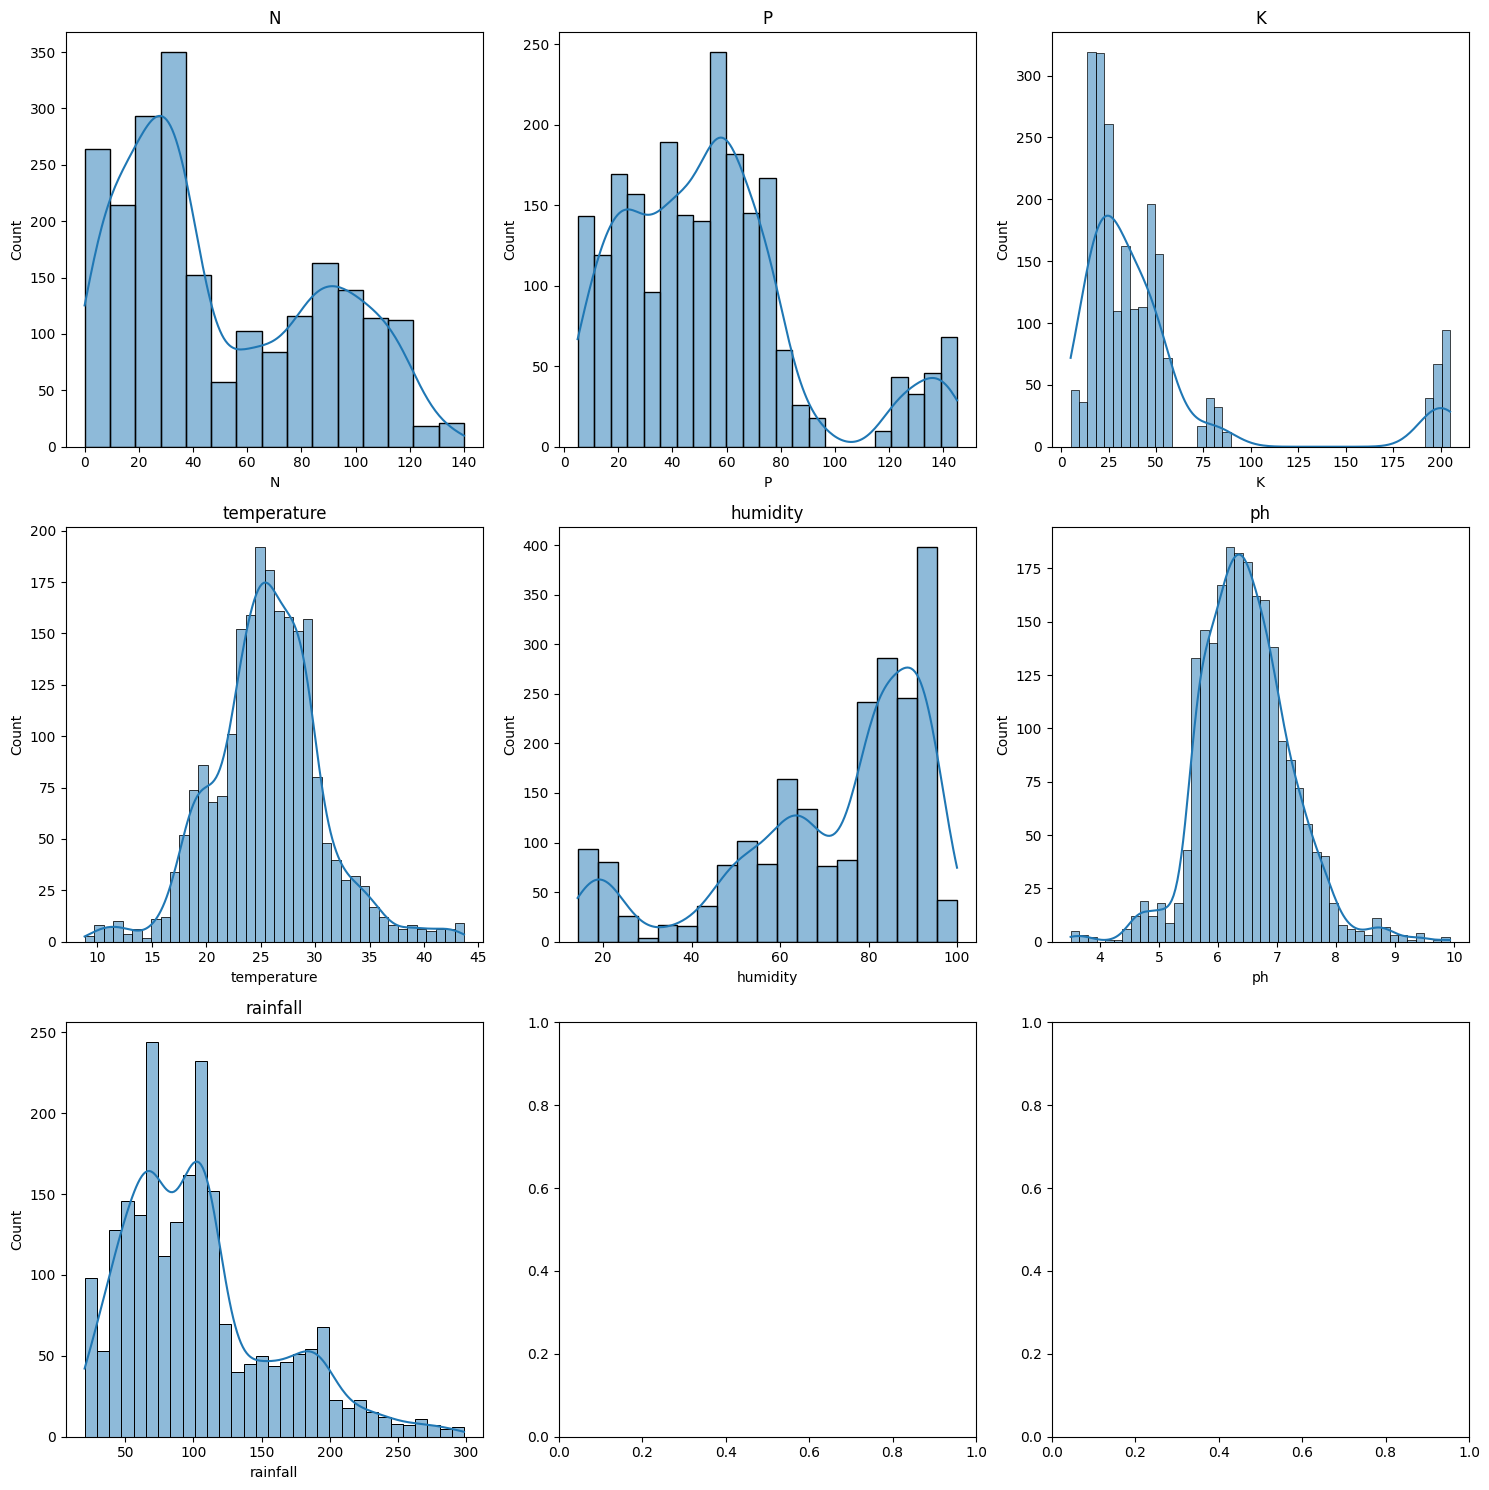

In [10]:
# visualize the distribution of each feature
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()


We have visualized the distribution of each feature using histograms. This helps in understanding the spread and skewness of the data.


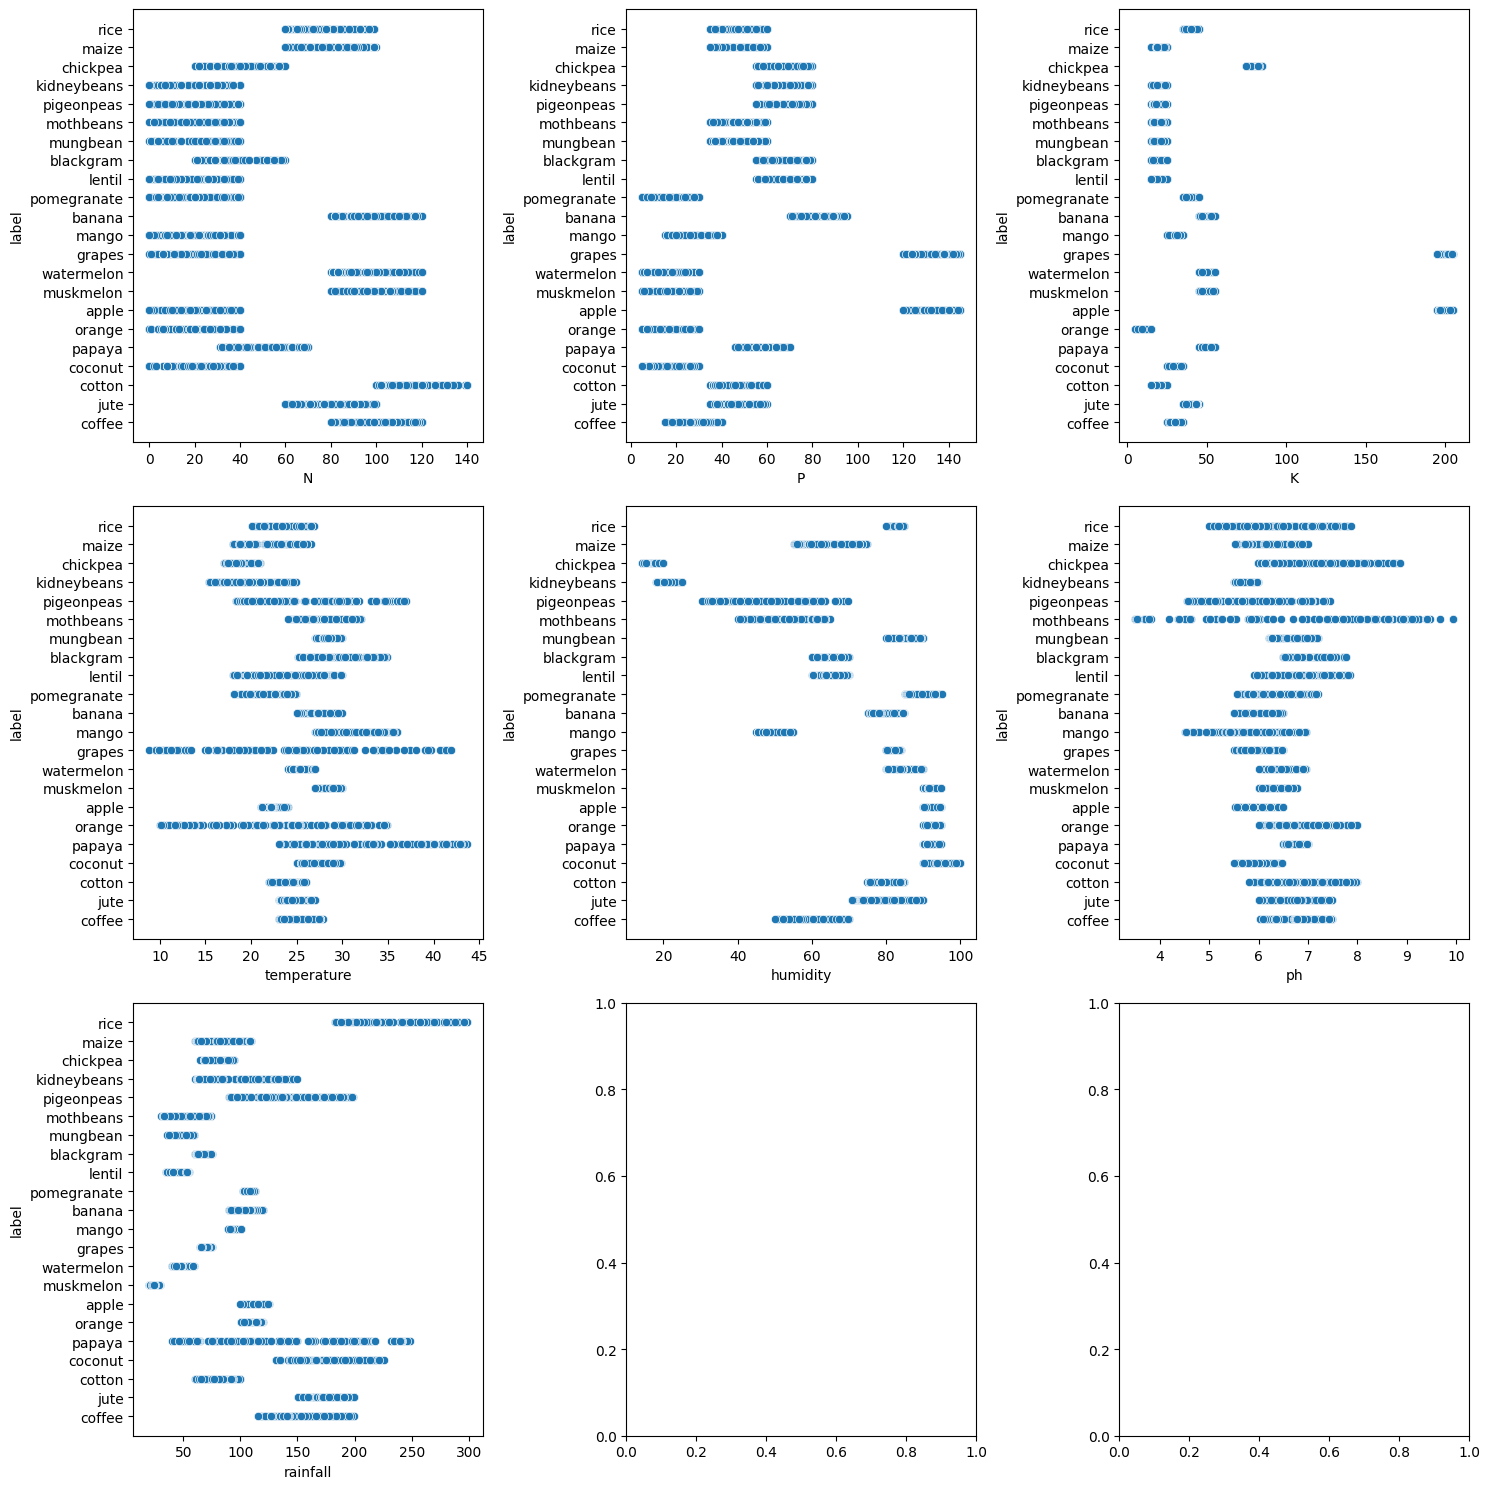

In [11]:
# plot scatter plot of each feature against the target
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label', data=crop, ax=subplot)
plt.tight_layout()
plt.show()


Next, we visualize the relationship between each feature and the target variable using scatter plots.


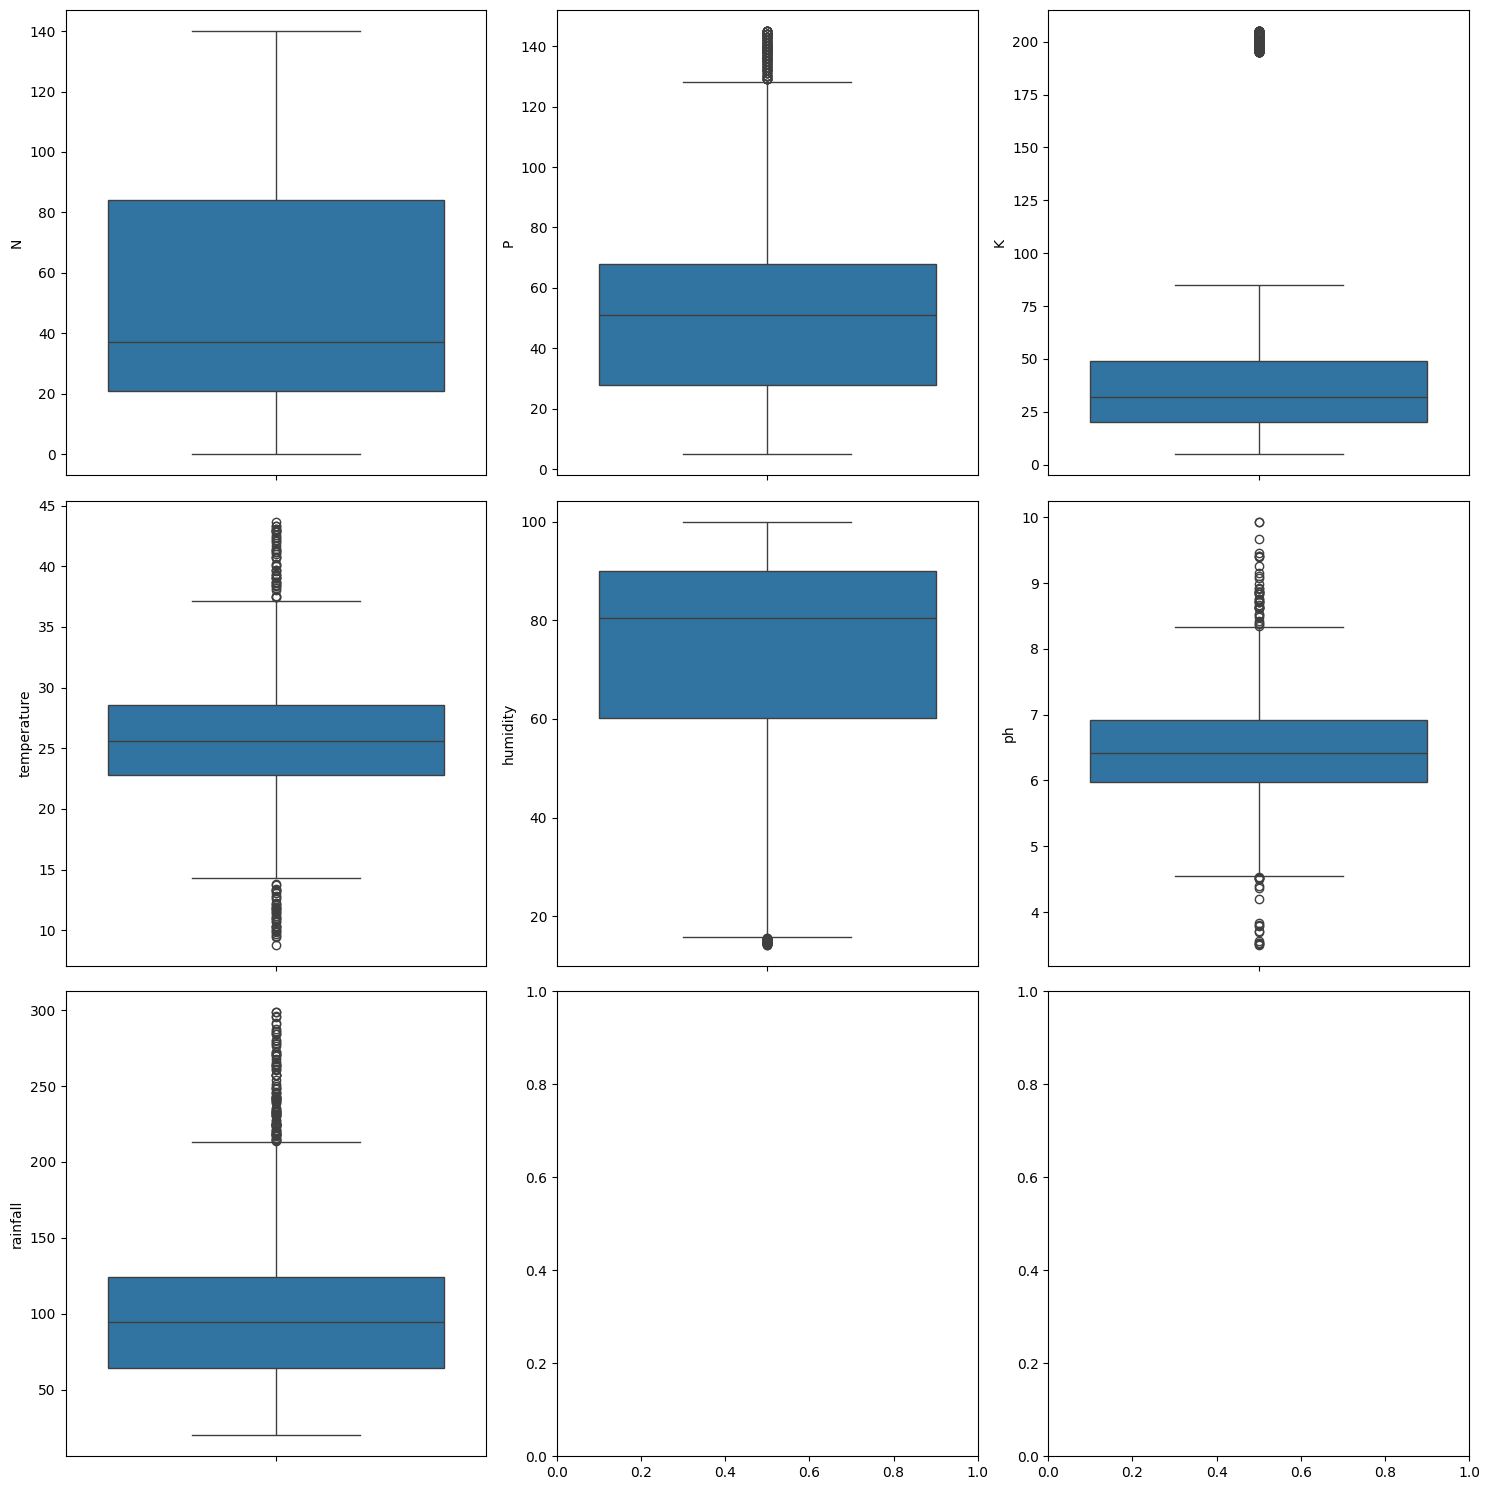

In [12]:
# create box plot for each feature to check for outliers
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i], ax=subplot)
plt.tight_layout()
plt.show()


Box plots are created for each feature to help identify any outliers present in the data.


In [13]:
# check the correlation of the features
numeric_columns = crop.select_dtypes(include=[np.number])
corr = numeric_columns.corr()
corr


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


We calculated the correlation matrix to understand the relationships between numerical features.


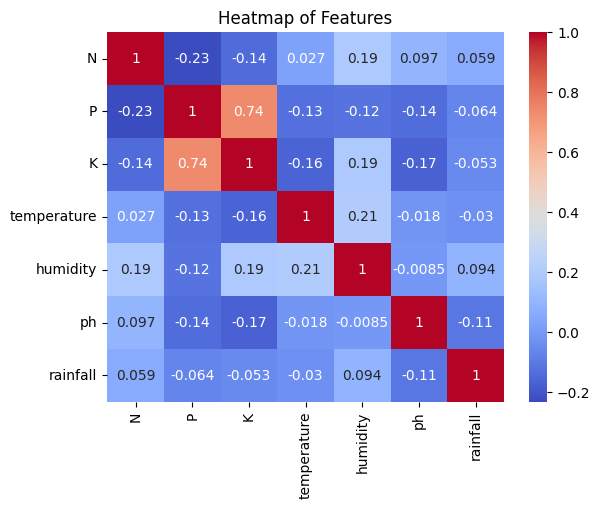

In [14]:
# Visualize the correlation matrix
import seaborn as sns
sns.heatmap(corr, annot=True, cbar=True, cmap='coolwarm')
plt.title("Heatmap of Features")
plt.show()


The correlation matrix heatmap provides an easy-to-understand view of how strongly the features are correlated with each other.


### Encoding

To prepare the data for machine learning, we need to encode the categorical target variable 'label' into numeric values.


In [15]:
# Create a dictionary for encoding crop types
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

# Apply the mapping to create the 'crop_no' column
crop['crop_no'] = crop['label'].map(crop_dict)
crop.head()


,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


We have encoded the crop names into numerical values and created a new column 'crop_no'.


In [16]:
# Drop the 'label' column as it's no longer needed
crop.drop('label', axis=1, inplace=True)
crop.tail()


,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,22


We have removed the 'label' column, and the dataset is now ready for machine learning tasks.


### Train-Test Split

We will now split the dataset into training and testing sets.


In [17]:
# Train-test split
x = crop.drop('crop_no', axis=1)
y = crop['crop_no']

print(f"The shape of x is : {x.shape}")
print(f"The shape of y is : {y.shape}")

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


The shape of x is : (2200, 7)
The shape of y is : (2200,)
Shape of x_train: (1760, 7)
Shape of y_train: (1760,)
Shape of x_test: (440, 7)
Shape of y_test: (440,)


We have successfully split the data into training and testing sets, with 80% of the data used for training and 20% for testing.


# WEEK 3: MODEL TRAINING AND CROP RECOMMENDATION SYSTEM

In this week, we focus on training a machine learning model to recommend crops based on environmental conditions. We'll scale our features, train a classifier, evaluate its performance, and finally build a predictive system that can be used in real-world applications.


# SCALING

Before training a machine learning model, it's important to scale the features to ensure that they are on the same scale. This improves the model's performance and training stability.

We use `StandardScaler` from `sklearn.preprocessing` to transform our training and test datasets.


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# TRAINING MODELS

We will now train a machine learning model using the **Decision Tree Classifier** from `sklearn.tree`. This classifier is easy to interpret and works well for this classification problem.

Steps:
1. Initialize the model.
2. Fit the model with training data.
3. Predict on test data.
4. Evaluate the model using accuracy score.


In [19]:
# Let's Train a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [20]:
# intialize the DecisionTree Classifier
DT = DecisionTreeClassifier()
# Train the model
DT.fit(x_train,y_train)

DecisionTreeClassifier()

# MODEL EVALUATION

After training the model, we evaluate its accuracy on both the **test dataset** and the **training dataset** using `accuracy_score`. High accuracy on both indicates good model performance.


In [21]:
# evaluate the model on test dataset
y_pred = DT.predict(x_test)
print(f"Accuracy score of Decision Tree Classifier is: {accuracy_score(y_test,y_pred)}")

Accuracy score of Decision Tree Classifier is: 0.9886363636363636


In [22]:
# evaluate the model on train dataset
y_pred_train = DT.predict(x_train)
print(f"Accuracy score of Decision Tree Classifier is: {accuracy_score(y_train,y_pred_train)}")

Accuracy score of Decision Tree Classifier is: 1.0


# PREDICTIVE SYSTEM

We create a function called `crop_recommend()` that accepts environmental parameters like nitrogen, phosphorus, potassium, temperature, humidity, pH, and rainfall. It uses the trained and scaled model to predict the most suitable crop for cultivation based on these features.

The model returns the crop name by mapping the predicted class number to its corresponding crop name using a dictionary.


In [23]:
def crop_recommend(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    transformed_features = sc.transform(features)
    prediction = DT.predict(transformed_features).reshape(1,-1)
    crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut",
                 6: "Papaya", 7: "Orange", 8: "Apple", 9: "Muskmelon", 10: "Watermelon",
                 11: "Grapes", 12: "Mango", 13: "Banana", 14: "Pomegranate", 15: "Lentil",
                 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",19: "Pigeonpeas",
                 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
    crop = [crop_dict[i] for i in prediction[0]]


    return f"{crop} is a best crop to be cultivated "

# EXAMPLE PREDICTION

We provide an example where environmental inputs are passed to the `crop_recommend()` function. The function processes these inputs and returns the best crop for that specific environment. For instance, in this example, the model recommends 'Coffee' as the best crop to be cultivated.


In [24]:
# Predicting the crop for the given environment
N = 122
P = 49
K = 13
temperature = 29
humidity = 42
ph = 6.1
rainfall = 202

crop_recommend(N,P,K,temperature,humidity,ph,rainfall)

"['Coffee'] is a best crop to be cultivated "

# SAVING THE MODEL

To reuse the model in future without retraining, we **serialize** (save) the trained model and the scaler using the `pickle` module. This allows us to deploy the model in a web app or another system easily.


In [25]:
# Save the model
import pickle
pickle.dump(DT, open('crop_model.sav', 'wb'))

# Save the scaler
pickle.dump(sc, open('crop_scaler.sav', 'wb'))

###Use a Trained saved model for new predictions

In [26]:
# load the saved model and predict the crop
DT = pickle.load(open('crop_model.sav', 'rb'))

# load the saved scaler
sc = pickle.load(open('crop_scaler.sav', 'rb'))

In [27]:
# Predicting the crop for the given environment
N = 90
P = 42
K = 43
temperature = 20
humidity = 82
ph = 6.1
rainfall = 202

crop_recommend(N,P,K,temperature,humidity,ph,rainfall)

"['Rice'] is a best crop to be cultivated "